# Insurance Charges Prediction Project

## Objective
To predict insurance charges using demographic and health-related data, leveraging supervised learning techniques.

## Problem Statement
How can we accurately estimate a customer’s insurance charges based on features like age, BMI, smoking status, and region?

## Hypotheses
1. Smoking status will be a major determinant of insurance charges.
2. Charges will increase with BMI and age.

## Success Metrics
- R² Score
- Mean Absolute Error (MAE)
- Root Mean Squared Error (MSE)

## Tools and Techniques
- **Tools**: Python, Jupyter Notebook, scikit-learn, matplotlib.
- **Techniques**: Regression models, feature engineering, and hyperparameter tuning.

## Workflow
1. Load and explore the data.
2. Perform EDA and visualization.
3. Preprocess the data.
4. Train multiple models and tune hyperparameters.
5. Evaluate the models using metrics.
6. Interpret the results and draw insights.
7. Summarize findings in a report.

LOADING THE DATASET

In [1]:
# Load the dataset
import pandas as pd
file_path = "C:/Users/Admin/Desktop/ml_project/Insurance_Charges_Prediction/insurance.xlsx"
insurance_df = pd.read_excel(file_path)
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [59]:
#Data Types
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Exploratory Data Analysis (EDA)
1. Check for missing values.
2. Understand the distribution of numerical features.
3. Analyze relationships between features and the target variable.


In [9]:
#CHECKING FOR MISSING VALUES
print(insurance_df.isna().sum().sort_values())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [11]:
#CHECKING FOR OTHER IMPORTANT INFO FROM THE DATA
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [63]:
#CHECK FOR THE SUMMARY STATISTICS OF NUMERICAL FEATURES
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [14]:
#CHECK FOR DUPLICATES
insurance_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

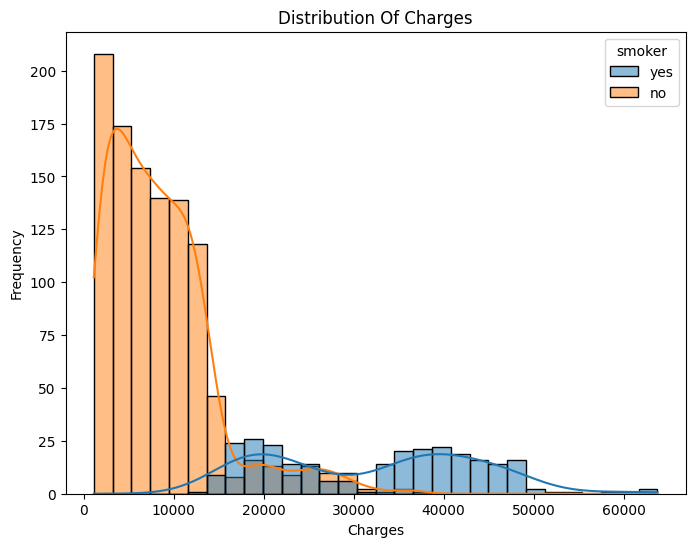

In [205]:
#Explore the Target Variable (charges)
import matplotlib.pyplot as plt
import seaborn as sns
#Distribution of insurance charges
plt.figure(figsize=(8,6))
sns.histplot(insurance_df,x='charges',hue='smoker',bins=30,kde=True)
plt.title('Distribution Of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [65]:
#Explore unique values for each categorical features
categorical_features=insurance_df[['sex','smoker','region']]
for feature in categorical_features:
    print(f'{feature}:\n{insurance_df[feature].value_counts()}\n')

sex:
sex
male      676
female    662
Name: count, dtype: int64

smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



In [66]:
#select numeric column first
numeric_columns=insurance_df.select_dtypes(include='number')


In [16]:
#Summary statistics od regions

#select numeric column first
numeric_columns=insurance_df.select_dtypes(include='number')

#Return back the region column
numeric_columns['region']=insurance_df['region']


numeric_columns.groupby('region').agg(['mean','std'])

age                   bmi            children            \
                mean        std       mean       std      mean       std   
region                                                                     
northeast  39.070946  14.213804  28.705726  5.875222  1.040541  1.212245   
northwest  38.957377  14.065922  28.870656  5.078582  1.111475  1.155948   
southeast  38.573290  14.189555  32.605863  6.469974  1.045603  1.190048   
southwest  39.381443  13.851262  30.143299  5.718148  1.140893  1.301489   

                charges               
                   mean          std  
region                                
northeast  10736.262980  7312.717872  
northwest  10363.593187  7727.389361  
southeast   9574.280940  7403.579116  
southwest   9021.451259  6320.958743

In [17]:
#Summary statistics of Gender


#select numeric column first
numeric_columns=insurance_df.select_dtypes(include='number')

#Return back the sex column
numeric_columns['sex']=insurance_df['sex']


numeric_columns.groupby('sex').agg(['mean','std'])

age                   bmi            children            \
             mean        std       mean       std      mean       std   
sex                                                                     
female  39.282680  14.052631  29.934167  5.945334  1.068627  1.196775   
male    38.684838  14.089590  30.263092  6.078327  1.100511  1.233125   

             charges               
                mean          std  
sex                                
female  10100.424469  7091.124221  
male     9747.728372  7396.101556

In [67]:
#Finding the correlation of only the numeric variables
numeric_columns.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [68]:
#Number of smokers and non smokers by gender
insurance_df.groupby('sex')['smoker'].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: count, dtype: int64

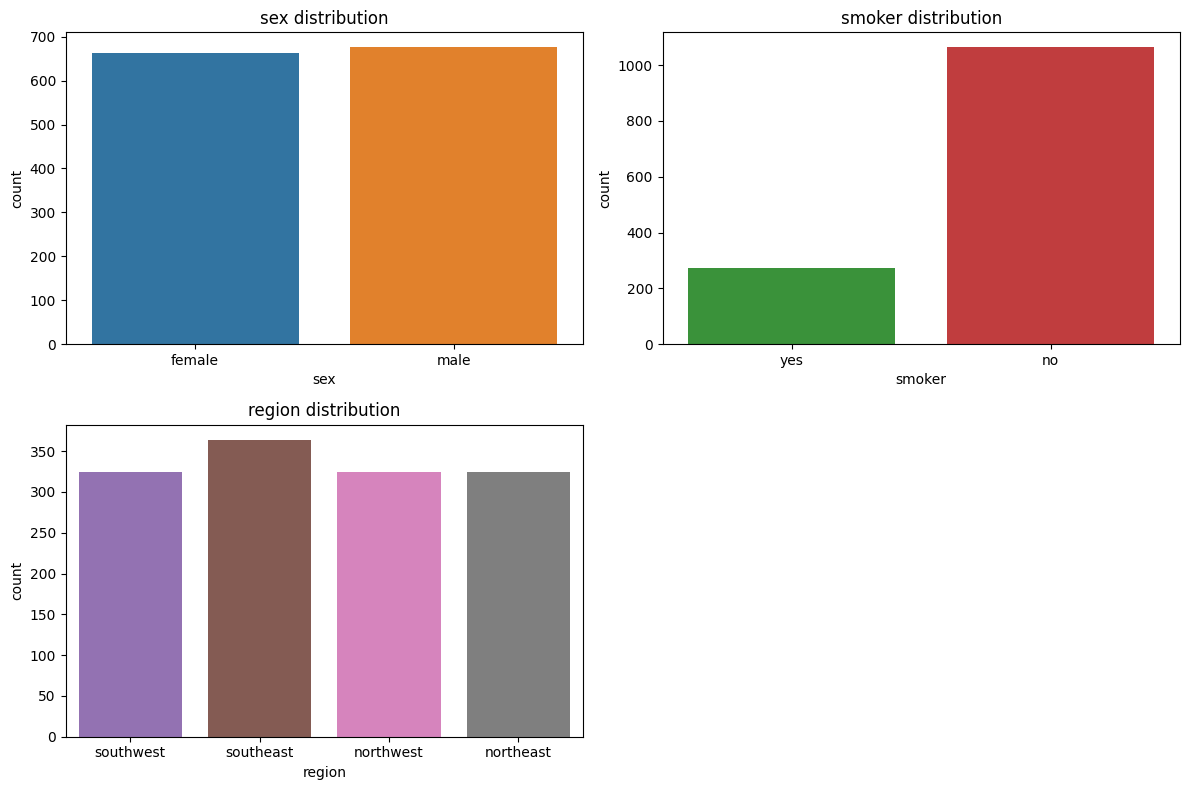

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_palette = {
    'sex': ['#1f77b4', '#ff7f0e'],
    'smoker': ['#2ca02c', '#d62728'],
    'region': ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
}

plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=feature, data=insurance_df, palette=custom_palette.get(feature, "Set2"),hue=feature, dodge=False)
    plt.title(f'{feature} distribution')
plt.tight_layout()
plt.show()

In [71]:
# Print the minimum and maximum charges rates for both smokers and non smokers
print('Min charge for smokers and non smokers:',insurance_df.groupby('smoker')['charges'].min(), 'Max charge for smokers and non smokers:',insurance_df.groupby('smoker')['charges'].max())


Min charge for smokers and non smokers: smoker
no      1121.8739
yes    12829.4551
Name: charges, dtype: float64 Max charge for smokers and non smokers: smoker
no     36910.60803
yes    63770.42801
Name: charges, dtype: float64


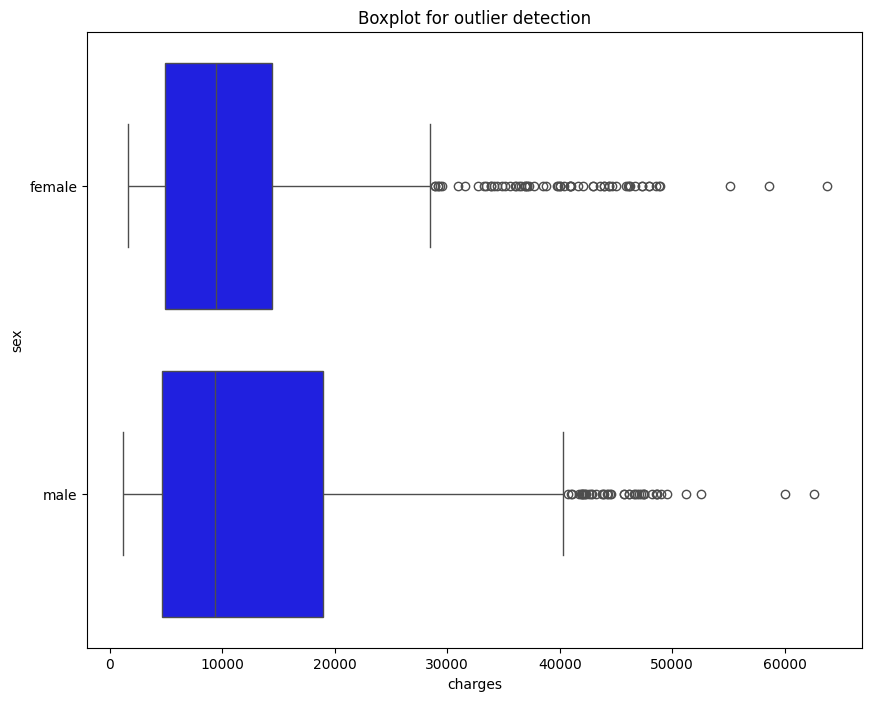

In [72]:
#Boxplot to detect outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(data=insurance_df,x='charges',y='sex',color='b')
plt.title('Boxplot for outlier detection')
plt.show()

### Preprocessing the dataset
We first need to encode the categorical features features,this can be done by creating dummy variables using the pandas library.
After we encode the dataframe,the next thing will be to split into training and testing.The last part of the preprocessing will be to 
scale the encoded data using standard scaler.

In [2]:
#Creating dummies from the insurance dataset
import pandas as pd
insurance_df_dummies=pd.get_dummies(insurance_df,drop_first=True)
insurance_df_dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [3]:
# Convert True/False to 1/0 in the encoded DataFrame
insurance_data_encoded = insurance_df_dummies.astype(int)
insurance_data_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0
1334,18,31,0,2205,0,0,0,0,0
1335,18,36,0,1629,0,0,0,1,0
1336,21,25,0,2007,0,0,0,0,1


Having encoded the data we can now have a better view of the relationships that exist among our features.The pearson correlation table,
the scatter plot and the heatmap below, all confirm that a person smoker status is a major determinant of insurance cost.Age also has little 
positive correlation with insurance charges aswell as bmi(body mas index)

In [158]:
#Checking the correlation of the variables
insurance_data_encoded.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.108437,0.042469,0.299009,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.108437,1.000000,0.011097,0.196188,0.046503,0.001669,-0.138495,0.271303,-0.004313
children,0.042469,0.011097,1.000000,0.067999,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299009,0.196188,0.067999,1.000000,0.057293,0.787251,-0.039905,0.073981,-0.043210
sex_male,-0.020856,0.046503,0.017163,0.057293,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.001669,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.138495,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.271303,-0.023066,0.073981,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004313,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


In [159]:
#Checking the correlation of the encoded data
insurance_data_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0,27.0,39.0,51.00,64.0
bmi,1338.0,30.169656,6.119875,15.0,26.0,30.0,34.00,53.0
children,1338.0,1.094918,1.205493,0.0,0.0,1.0,2.00,5.0
charges,1338.0,13269.928999,12110.012755,1121.0,4740.0,9381.5,16639.25,63770.0
sex_male,1338.0,0.505232,0.500160,0.0,0.0,1.0,1.00,1.0
smoker_yes,1338.0,0.204783,0.403694,0.0,0.0,0.0,0.00,1.0
region_northwest,1338.0,0.242900,0.428995,0.0,0.0,0.0,0.00,1.0
region_southeast,1338.0,0.272048,0.445181,0.0,0.0,0.0,1.00,1.0
region_southwest,1338.0,0.242900,0.428995,0.0,0.0,0.0,0.00,1.0


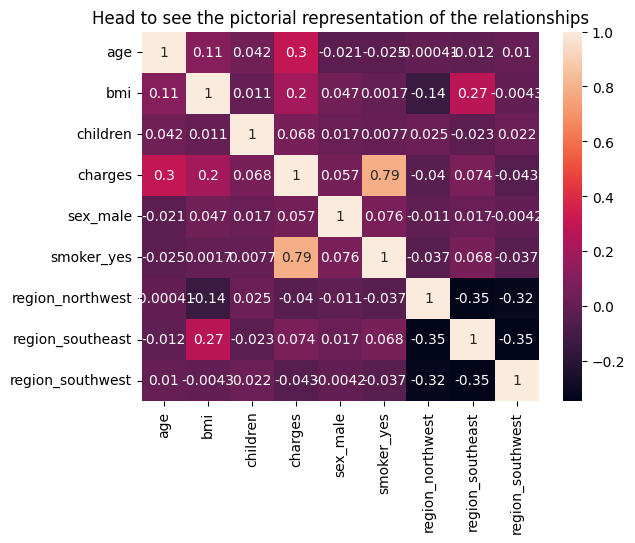

In [160]:
#Head Map to confirm the above correlations
sns.heatmap(insurance_data_encoded.corr(),annot=True)
plt.title('Head to see the pictorial representation of the relationships')
plt.show()

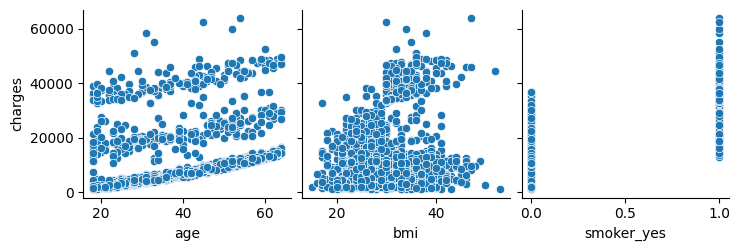

In [161]:
# Pairplot to see relationships between some selected numerical features and target
sns.pairplot(insurance_data_encoded, x_vars=['age', 'bmi', 'smoker_yes'], y_vars='charges', kind='scatter')
plt.show()


In [4]:
#Features
x=insurance_data_encoded.drop(['charges'],axis=1).values
x

array([[19, 27,  0, ...,  0,  0,  1],
       [18, 33,  1, ...,  0,  1,  0],
       [28, 33,  3, ...,  0,  1,  0],
       ...,
       [18, 36,  0, ...,  0,  1,  0],
       [21, 25,  0, ...,  0,  0,  1],
       [61, 29,  0, ...,  1,  0,  0]])

In [5]:
#Targets
y=insurance_data_encoded['charges'].values
y

array([16884,  1725,  4449, ...,  1629,  2007, 29141])

In [6]:
#Splitting into training into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


### Scaling the encoded data
To ensure all features contribute equally to the model, I scaled the numerical features using StandardScaler from sklearn. 
This method standardizes the data by centering it around the mean and scaling it to have a unit variance.This step is essential 
to prevent features with larger magnitudes from dominating the learning process.
Both the training and testing datasets were scaled for consistency

In [7]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [8]:
#Train the Model(s):
#Fit the chosen model(s) to the training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train)

#Make predictions using the model
y_pred=model.predict(x_test_scaled)

print("Predictions : {}\n Actual Values : {}".format(y_pred[0:6],y_test[0:6]))

Predictions : [ 9087.64215363  7232.55948323 36744.39282136  9390.86060464
 26835.96961506 10700.88438873]
 Actual Values : [ 9095  5272 29330  9301 33750  4536]


In [9]:
from sklearn.metrics import root_mean_squared_error
#Compute the R_Squared
r_squared=model.score(x_test_scaled,y_test)

#Compute the RMSE
rmse=root_mean_squared_error(y_test,y_pred)

#Print the metrics
print('R^2 : {}'.format(r_squared))
print('RMSE : {}'.format(rmse))     

R^2 : 0.7837888448800691
RMSE : 5793.6551274045


### Cross-Validation for Model Performance Evaluation
After building a simple linear regression model, we evaluate its performance using cross-validation. This technique helps assess the model's reliability by ensuring it maintains consistent performance across different data splits. A high-performing model should exhibit low variance and stable cross-validation scores.

In [168]:
# Performing a cross validation to evaluate the perfomance of the linear reg model
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10,shuffle=True,random_state=42)

#Compute a six_fold cross validation score
cv_scores=cross_val_score(model,x_train_scaled,y_train,cv=kf)

#Print the cv_scores
print(cv_scores)

[0.75533115 0.69674292 0.69533922 0.71546896 0.72651184 0.81308537
 0.66611223 0.74080094 0.7429972  0.80208883]


In [169]:
#Analysing the cross validation scores
import numpy as np

#Print the mean
print('Average_Score:',np.mean(cv_scores))

#Print the standard deviation
print('Standard_Deviation:',np.std(cv_scores))

#Print the 95% convidence interval
print('95% confidence interval:',np.quantile(cv_scores,[0.025,0.975]))

Average_Score: 0.7354478657066199
Standard_Deviation: 0.04398045872810884
95% confidence interval: [0.6726883  0.81061115]


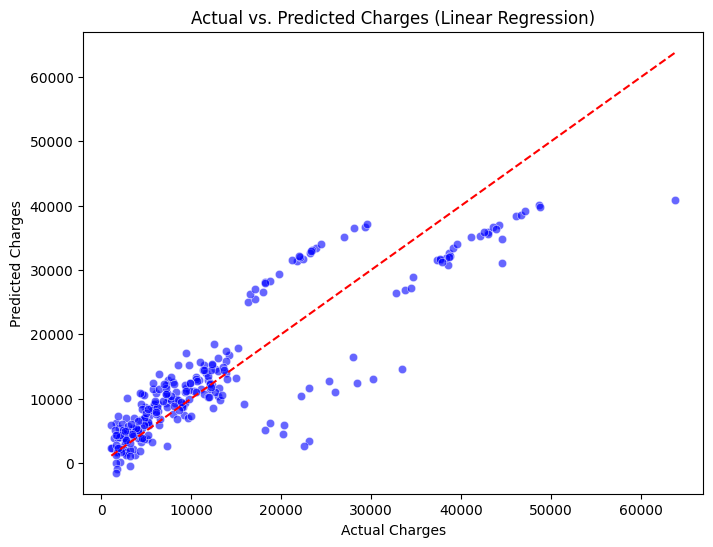

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Perfect fit line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Linear Regression)")
plt.show()


### Experimenting with regularization
Regularization helps us to reduce overfitting of the model by penalysing very large coefficients,this will also help us in detecting which 
features actually contribute significantly to the target(insurance charges) variable.We begin by using GridSearchCV to cross validate the 
best alpha values.We shall perform both the Ridge and Lasso to if that will improve the score and reduce the rmse.

In [171]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#Define the range of alpha values to test
param_grid={'alpha':[0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}

#Define the Ridge model
ridge=Ridge()

#GridSearchCv with 10 fold cross validation
grid_search= GridSearchCV(ridge,param_grid,cv=10,scoring='r2')


#Fit the training data
grid_search.fit(x_train_scaled,y_train)

#Print the best alpha and the corresponding score
print(f'Best Alpha: {grid_search.best_params_}')
print(f'Best cross validation R2: {grid_search.best_score_:4f}')

Best Alpha: {'alpha': 10.0}
Best cross validation R2: 0.729792


In [175]:
# Training with the best alpha
best_ridge=Ridge(alpha=10.0)

#Fit the model on the training data
best_ridge.fit(x_train_scaled,y_train)

#Evaluate the performance on the training set
train_r2=best_ridge.score(x_train_scaled,y_train)

#Evaluate the perfomance on the test set
test_r2=best_ridge.score(x_test_scaled,y_test)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2:4f}')

Train R2 Score: 0.7415668372450812
Test R2 Score: 0.783198


In [176]:
# Performing a cross validation to evaluate the perfomance of the ridge reg model
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10,shuffle=True,random_state=42)

#Compute a six_fold cross validation score
cv_scores=cross_val_score(best_ridge,x_train_scaled,y_train,cv=kf)

#Print the cv_scores
print(cv_scores)

[0.75444963 0.6970034  0.69470938 0.71658602 0.72656106 0.81327107
 0.6668947  0.74036586 0.74357865 0.80140648]


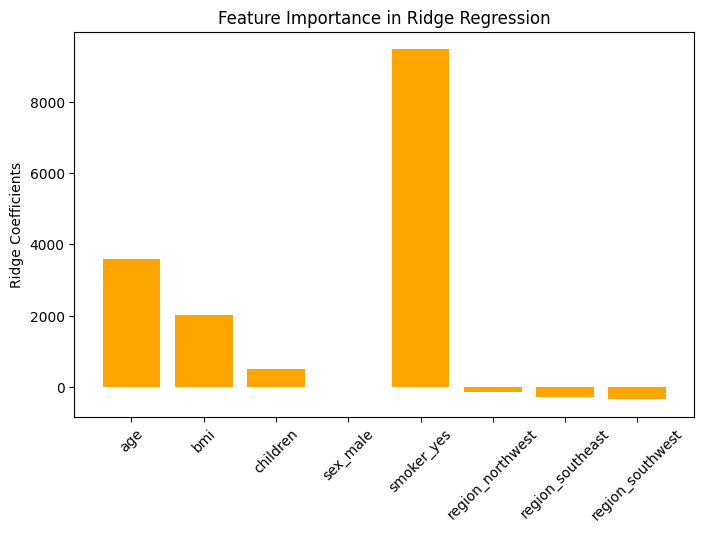

In [177]:
# Get coefficients and visualising to see which features contribute significantly
ridge_coef = best_ridge.coef_

# Get the feature names (excluding the target variable)
feature_columns = insurance_data_encoded.drop(columns=['charges']).columns  

# Plot Ridge coefficients
plt.figure(figsize=(8, 5))
plt.bar(feature_columns, ridge_coef, color='orange')
plt.xticks(rotation=45)
plt.ylabel("Ridge Coefficients")
plt.title("Feature Importance in Ridge Regression")
plt.show()

In [178]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#Define the range of alpha values to test
param_grid={'alpha':[0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}

#Define the Ridge model
lasso=Lasso(max_iter=10000)

#GridSearchCv with 10 fold cross validation
grid_search= GridSearchCV(lasso,param_grid,cv=10,scoring='r2')


#Fit the training data
grid_search.fit(x_train_scaled,y_train)

#Print the best alpha and the corresponding score
print(f'Best Alpha: {grid_search.best_params_}')
print(f'Best cross validation R2: {grid_search.best_score_:4f}')

Best Alpha: {'alpha': 100.0}
Best cross validation R2: 0.730570


In [179]:
# Training with the best alpha
best_lasso=Lasso(alpha=100.0)

#Fit the model on the training data
best_lasso.fit(x_train_scaled,y_train)

#Evaluate the performance on the training set
train_r2=best_lasso.score(x_train_scaled,y_train)

#Evaluate the perfomance on the test set
test_r2=best_lasso.score(x_test_scaled,y_test)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2:4f}')

Train R2 Score: 0.7409779706310528
Test R2 Score: 0.780808


[3530.55329971 1889.82247517  427.64261602    0.         9454.75366328
   -0.          -20.57061159 -109.4709285 ]


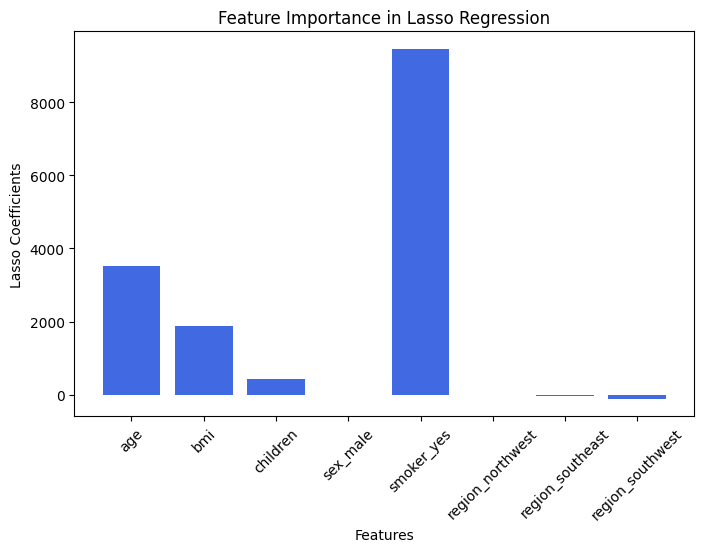

In [180]:
import matplotlib.pyplot as plt

# Get the feature names (excluding the target variable)
feature_columns = insurance_data_encoded.drop(columns=['charges']).columns  # Replace 'charges' with your actual target column

# Compute and print the coefficients
lasso_coef = best_lasso.coef_
print(lasso_coef)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.bar(feature_columns, lasso_coef, color='royalblue')
plt.xlabel('Features')
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance in Lasso Regression')
plt.xticks(rotation=45)
plt.show()


### Experimenting with few selected features
Having seen that the lasso and ridge regression models helps us in detecting the most important features,we can concude from
the two previous bar plots above that smoker status is a major determinant of charges,followed by age,bmi and the number of children.
We are now going to train the model based on this features to see if there will be some improvements in the rmse.

In [181]:
x_1= insurance_data_encoded[['age', 'bmi', 'children','smoker_yes']].values
y_1= insurance_data_encoded['charges'].values

In [182]:
y_1

array([16884,  1725,  4449, ...,  1629,  2007, 29141])

In [183]:
#Splitting into training into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [184]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [185]:
#Instantiate the model:
#Fit the chosen model(s) to the training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train)

#Make predictions using the model
y_pred=model.predict(x_test_scaled)

#Print the first six values of the predictions
print("Predictions : {}\n Actual Values : {}".format(y_pred[0:6],y_test[0:6]))

Predictions : [ 9087.64215363  7232.55948323 36744.39282136  9390.86060464
 26835.96961506 10700.88438873]
 Actual Values : [ 9095  5272 29330  9301 33750  4536]


In [186]:
from sklearn.metrics import root_mean_squared_error
#Compute the R_Squared
r_squared=model.score(x_test_scaled,y_test)

#Compute the RMSE
rmse=root_mean_squared_error(y_test,y_pred)

#Print the metrics
print('R^2 : {}'.format(r_squared))
print('RMSE : {}'.format(rmse))     

R^2 : 0.7837888448800691
RMSE : 5793.6551274045


In [187]:
# Performing a cross validation to evaluate the perfomance of the linear reg model
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10,shuffle=True,random_state=42)

#Compute a six_fold cross validation score
cv_scores=cross_val_score(model,x_train_scaled,y_train,cv=kf)

#Print the cv_scores
print(cv_scores)

[0.75533115 0.69674292 0.69533922 0.71546896 0.72651184 0.81308537
 0.66611223 0.74080094 0.7429972  0.80208883]


In [188]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#Define the range of alpha values to test
param_grid={'alpha':[0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}

#Define the Ridge model
ridge=Ridge()

#GridSearchCv with 10 fold cross validation
grid_search= GridSearchCV(ridge,param_grid,cv=10,scoring='r2')


#Fit the training data
grid_search.fit(x_train_scaled,y_train)

#Print the best alpha and the corresponding score
print(f'Best Alpha: {grid_search.best_params_}')
print(f'Best cross validation R2: {grid_search.best_score_:4f}')

Best Alpha: {'alpha': 10.0}
Best cross validation R2: 0.729792


In [189]:
# Training with the best alpha
best_ridge=Ridge(alpha=10.0)

#Fit the model on the training data
best_ridge.fit(x_train_scaled,y_train)

#Evaluate the performance on the training set
train_r2=best_ridge.score(x_train_scaled,y_train)

#Evaluate the perfomance on the test set
test_r2=best_ridge.score(x_test_scaled,y_test)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2:4f}')

Train R2 Score: 0.7415668372450812
Test R2 Score: 0.783198


In [190]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#Define the range of alpha values to test
param_grid={'alpha':[0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}

#Define the Ridge model
lasso=Lasso(max_iter=10000)

#GridSearchCv with 10 fold cross validation
grid_search= GridSearchCV(lasso,param_grid,cv=10,scoring='r2')


#Fit the training data
grid_search.fit(x_train_scaled,y_train)

#Print the best alpha and the corresponding score
print(f'Best Alpha: {grid_search.best_params_}')
print(f'Best cross validation R2: {grid_search.best_score_:4f}')

Best Alpha: {'alpha': 100.0}
Best cross validation R2: 0.730570


In [191]:
# Training with the best alpha
best_lasso=Lasso(alpha=10.0)

#Fit the model on the training data
best_lasso.fit(x_train_scaled,y_train)

#Evaluate the performance on the training set
train_r2=best_lasso.score(x_train_scaled,y_train)

#Evaluate the perfomance on the test set
test_r2=best_lasso.score(x_test_scaled,y_test)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2:4f}')

Train R2 Score: 0.7416238241486638
Test R2 Score: 0.783515


### Experimenting with other algorithms
Having seen that that regularization did not improve performance,probably because our features are not so large,we are now going
to experiment with other algorithms to see if there is going to be change in the metrics.The first algorithym will be the RandomForestRegressor

In [10]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(x_train_scaled, y_train)

y_train_predict=rfr_model.predict(x_train_scaled)
y_pred = rfr_model.predict(x_test_scaled)

print("Predictions : {}\n Actual Values : {}".format(y_pred[0:10],y_test[0:10]))

Predictions : [ 9672.39        5283.42       28300.         12149.68
 34372.21666667  8164.61        2106.5        14951.32
  6555.73       10765.55      ]
 Actual Values : [ 9095  5272 29330  9301 33750  4536  2117 14210  3732 10264]


In [11]:
from sklearn.metrics import root_mean_squared_error
#Compute the R_Squared
r_squared_train=rfr_model.score(x_train_scaled,y_train)
r_squared_test=rfr_model.score(x_test_scaled,y_test)

#Compute the RMSE
rmse_train=root_mean_squared_error(y_train,y_train_predict)
rmse_test=root_mean_squared_error(y_test,y_pred)

#Print the metrics
print('Test R^2 : {}'.format(r_squared_test))
print('Test RMSE : {}'.format(rmse_test))  

#Print the metrics
print('Train R^2 : {}'.format(r_squared_train))
print('Test RMSE : {}'.format(rmse_train))     

Test R^2 : 0.8568360910164675
Test RMSE : 4714.442740198002
Train R^2 : 0.9731689844499314
Test RMSE : 1967.8976090907836


In [12]:
# Performing a cross validation to evaluate the perfomance of the RandomForestRegressor model
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10,shuffle=True,random_state=42)

#Compute a six_fold cross validation score
cv_scores=cross_val_score(rfr_model,x_train_scaled,y_train,cv=kf)

#Print the cv_scores
print(cv_scores)

[0.81565163 0.78578118 0.80758399 0.83014895 0.83669615 0.8828171
 0.79275059 0.81444587 0.80307019 0.87050696]


In [13]:
#Analysing the cross validation scores 
import numpy as np

#Print the mean
print('Average_Score:',np.mean(cv_scores))

#Print the standard deviation
print('Standard_Deviation:',np.std(cv_scores))

#Print the 95% convidence interval
print('95% confidence interval:',np.quantile(cv_scores,[0.025,0.975]))

Average_Score: 0.8239452599536694
Standard_Deviation: 0.030210996703701934
95% confidence interval: [0.7873493  0.88004732]


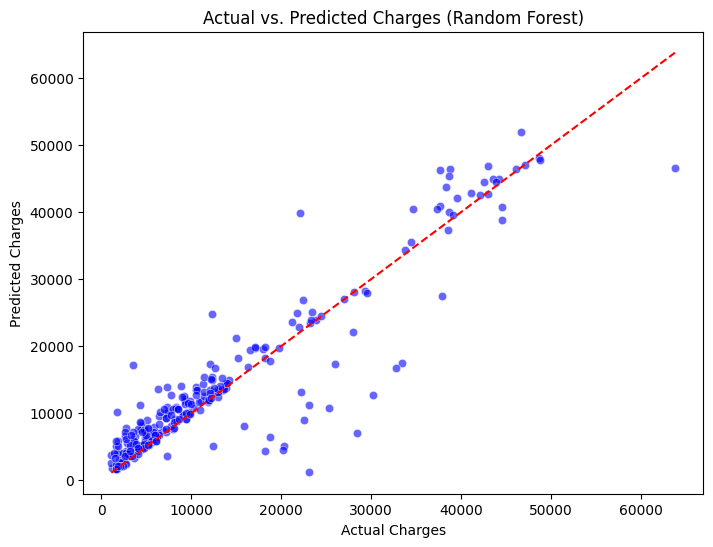

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Perfect fit line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Random Forest)")
plt.show()


In [ ]:
We will now try 

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [22]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [23]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_regressor.fit(x_train_scaled, y_train)

# Predictions
y_train_pred = xgb_regressor.predict(x_train_scaled)
y_test_pred = xgb_regressor.predict(x_test_scaled)

In [24]:
# R^2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train R^2 Score: 0.927800714969635
Test R^2 Score: 0.8610954284667969
Train RMSE: 3228.1249975798646
Test RMSE: 4643.782079297003


In [210]:
cv_scores = cross_val_score(xgb_regressor, x_train_scaled, y_train, cv=10, scoring='r2')

print("Cross-Validation Scores:", cv_scores)
print("Average Score:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross-Validation Scores: [0.84893161 0.82468659 0.9142698  0.90879345 0.82945138 0.76703972
 0.76993221 0.81080961 0.84382927 0.82263756]
Average Score: 0.8340381205081939
Standard Deviation: 0.04660423239776093


### Hyperparameter Tuning and Model Evaluation

In [ ]:
# Performing hyperparameter tuning using RandomizedSearchCV to find the best parameters for XGBRegressor.
# The model is trained using the optimal parameters, and performance is evaluated on both train and test data.
# Finally, R² score and RMSE are computed to assess model accuracy.

In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# ✅ Define the XGBRegressor model
xgb = XGBRegressor(random_state=42)

# ✅ Define parameter grid
random_grid = {
    'n_estimators': np.random.randint(100, 500, 5),  
    'max_depth': [3, 6, 9],  
    'learning_rate': [0.01, 0.1, 0.3],  
    'subsample': [0.7, 0.9, 1.0],  
    'colsample_bytree': [0.7, 0.9, 1.0],  
    'reg_lambda': [1, 10],  
    'reg_alpha': [0, 1]  
}

# ✅ Pass the model to RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,  # ✅ Use XGBRegressor() here
    param_distributions=random_grid,  
    n_iter=20,  
    scoring='r2',  
    cv=5,  
    verbose=2,  
    n_jobs=-1,  
    random_state=42
)

# ✅ Fit the model
random_search.fit(x_train_scaled, y_train)

# ✅ Print the best parameters
print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 389, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.9}


In [30]:
# ✅ Import the model
from xgboost import XGBRegressor

# ✅ Define the final model with best parameters
xgb_final = XGBRegressor(
    subsample=0.7,
    reg_lambda=10,
    reg_alpha=0,
    n_estimators=389,
    max_depth=3,
    learning_rate=0.01,
    colsample_bytree=0.9,
    random_state=42
)

# ✅ Train the model on the full training set
xgb_final.fit(x_train_scaled, y_train)

# ✅ Evaluate performance
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions
y_train_pred = xgb_final.predict(x_train_scaled)
y_test_pred = xgb_final.predict(x_test_scaled)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# ✅ Print Results
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train R² Score: 0.8688
Test R² Score: 0.8693
Train RMSE: 4351.9200
Test RMSE: 4504.6447


In [44]:
#Features according to their importance
print(insurance_data_encoded.corr()["charges"].sort_values(ascending=False))

charges             1.000000
smoker_yes          0.787251
age                 0.299009
bmi                 0.196188
region_southeast    0.073981
children            0.067999
sex_male            0.057293
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


In [45]:
import joblib

# Save the trained model
joblib.dump(xgb_final, "xgb_final.pkl")

print("Model saved successfully!")


Model saved successfully!
